### 1. Datos y limpieza

In [1]:
#Carga de librerias y dataset

import numpy as np
import pandas as pd

# Cargar datos
df_original = pd.read_csv("./data/googleplaystore.csv")

display(df_original)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [2]:
# Mostramos la info:

df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [3]:
#Generamos una copia con la que vamos a trabajar despues, para no perder el original

df_apps = df_original.copy()

In [4]:
# En primer lugar vamos a eliminar las columnas que no nos interesan:
# Tanto el requerimiento minimo como la versión actual no nos aportan nada para el análisis
# La última fecha de actualización tampoco, puesto que sabemos que es un dataset del 2018 cuyo análisis podemos extrapolar (no va a haber fechas mas allá de 2018)
# Genres es redundante con Category. Nos centraremos en categorizar bien Category y nos desharemos de Genres
# Content Rating tampoco nos interesa, la gran mayoría de apps las puede descargar cualquiera, y tampoco creo que eso nos fuese a dar información relevante en el análisis

df_apps.drop(columns=["Current Ver", "Android Ver", "Last Updated", "Genres", "Content Rating"], inplace=True)

In [5]:
# Hacemos un Value Counts de las apps para ver si hay duplicados

df_apps.App.value_counts()

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
8 Ball Pool                                          7
                                                    ..
Fr. Daoud Lamei                                      1
Poop FR                                              1
PLMGSS FR                                            1
List iptv FR                                         1
Kids Paint Free - Drawing Fun                        1
Name: count, Length: 9660, dtype: int64

In [6]:
# Vemos que sí, vamos a ver por ejemplo por que hay 9 ROBLOX distintos

df_apps[df_apps.App == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0


In [7]:
# Vemos que coinciden todas las columnas, solo cambia el número de reseñas.
# Usando un drop duplicates "sin argumentos" no cambiaría nada pues no coinciden todas las columnas, así que ordenaremos por número de reseñas
# y nos quedaremos con los últimos datos recogidos de cada app (es decir, cuándo el número de reseñas es mayor)
df_apps = df_apps.sort_values("Reviews", ascending=False)
df_apps = df_apps.drop_duplicates(subset="App", keep="first")

# Comprobamos que lo hemos hecho bien (es decir, que hay una App por fila)
df_apps["App"].value_counts()

App
G-NetReport Pro                      1
GollerCepte Live Score               1
Ad Block REMOVER - NEED ROOT         1
SnipSnap Coupon App                  1
US Open Tennis Championships 2018    1
                                    ..
Best Car Wallpapers                  1
Funny Pics                           1
Teach Me Anatomy                     1
tutti.ch - Free Classifieds          1
Family Guy The Quest for Stuff       1
Name: count, Length: 9660, dtype: int64

In [8]:
# Tratamos nulos. Hay varias columnas clave a analizar. Si hay algun nulo en alguna de esas columnas, eliminamos esa fila puesto que perdemos capacidad de analisis

columnas_clave = ["Rating", "Installs", "Price", "Type"]
df_apps.dropna(subset=columnas_clave, inplace=True)

In [9]:
# Vamos a ver la info para comprobar como va la limpieza y seguimos viendo donde tocar
print(df_apps.info())

<class 'pandas.core.frame.DataFrame'>
Index: 8197 entries, 2989 to 2482
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       8197 non-null   object 
 1   Category  8197 non-null   object 
 2   Rating    8197 non-null   float64
 3   Reviews   8197 non-null   object 
 4   Size      8197 non-null   object 
 5   Installs  8197 non-null   object 
 6   Type      8197 non-null   object 
 7   Price     8197 non-null   object 
dtypes: float64(1), object(7)
memory usage: 576.4+ KB
None


In [10]:
# Vemos que ya no hay nulos, así que vamos a ir cambiando el tipo de objeto de algunas columnas a otros que nos interesen más

In [11]:
# Primero con Reviews que parecía sencillo. Vamos a hacer un value counts
df_apps.Reviews.value_counts()

Reviews
2         82
3         76
5         74
4         74
1         67
          ..
100130     1
10006      1
84311      1
8419       1
99559      1
Name: count, Length: 5322, dtype: int64

In [12]:
# Lo convertimos sin más a numérico (es un número de reseñas, conviene tenerlo en numérico no en object)
df_apps["Reviews"] = pd.to_numeric(df_apps["Reviews"], errors = "coerce")  #coerce hace que lo que no pueda convertir lo transforma en NaN (ese NaN será el causante de que la columna se tratase como object y no como entero directamente)

In [13]:
# Ahora queremos limpiar y convertir "Installs" a numérico también (aunque siempre teniendo en cuenta que son umbrales de descarga no datos exactos) y que se interpretan así:
# Si una app tiene 1 millon de descargas, estara solo en la categoria 1000000, no va a estar en todas las que estan por debajo (50,1000,500000...)
# Primero hacemos un value counts para ver que formato siguen los datos:
df_apps.Installs.value_counts()

Installs
1,000,000+        1416
100,000+          1095
10,000+            986
10,000,000+        934
1,000+             697
5,000,000+         608
500,000+           504
50,000+            457
5,000+             425
100+               303
50,000,000+        203
500+               199
100,000,000+       188
10+                 69
50+                 56
500,000,000+        24
1,000,000,000+      20
5+                   9
1+                   3
Free                 1
Name: count, dtype: int64

In [14]:
# Vemos que siguen un mismo formato. Vamos a trabajar con ello: 
# Eliminamos los valores erróneos
df_apps = df_apps[df_apps["Installs"] != "Free"]

# Quitamos "+" y "," y conservamos solo los que se pueden convertir a número
df_apps["Installs"] = df_apps["Installs"].str.replace("[+,]", "" , regex=True)

# Eliminamos las que no sean numéricas
df_apps = df_apps[df_apps["Installs"].str.isdigit()]

# Convertimos a entero
df_apps["Installs"] = df_apps["Installs"].astype(int)

In [15]:
# Ahora convertimos "Price" a float
df_apps.Price.value_counts()

Price
0         7592
$2.99      109
$0.99      104
$4.99       68
$1.99       59
          ... 
$4.60        1
$9.00        1
$15.99       1
$3.88        1
$3.04        1
Name: count, Length: 73, dtype: int64

In [16]:
# Siguen de nuevo el mismo formato
# Eliminamos $, usando expresiones regulares
df_apps["Price"] = df_apps["Price"].str.replace(r"\$", "" , regex=True)  #Usamos el rawstring para que no se malinterprete el símbolo $, que normalmente se usa para referenciar dígitos

# Convertimos a float
df_apps["Price"] = df_apps["Price"].astype(float)

In [17]:
# Ibamos a convertir Size a bytes para hacerlo float, pero hay demasiadas apps cuyo tamaño depende del dispositivo, algunas muy importantes, asi que lo dejamos como está

In [18]:
# Revisamos de nuevo los valores únicos de las variables para detectar si hay algo que falta por limpiar
for col in df_apps.columns:
    print(f"\nColumna: {col}")
    print(df_apps[col].value_counts(dropna=False))


Columna: App
App
Familyfirst Messenger                                 1
GollerCepte Live Score                                1
Ad Block REMOVER - NEED ROOT                          1
SnipSnap Coupon App                                   1
CN Resident                                           1
                                                     ..
MegaFon Dashboard                                     1
Easy Resume Builder, Resume help, Curriculum vitae    1
BSPlayer ARMv7 VFP CPU support                        1
Adult Color by Number Book - Paint Mandala Pages      1
DreamTrips                                            1
Name: count, Length: 8196, dtype: int64

Columna: Category
Category
FAMILY                 1654
GAME                    895
TOOLS                   719
FINANCE                 302
LIFESTYLE               301
PRODUCTIVITY            301
PERSONALIZATION         298
MEDICAL                 290
BUSINESS                263
PHOTOGRAPHY             263
SPORTS            

In [19]:
# Nos queda por afinar las categorías. Hay varias de las que vienen predeterminadas que podríamos englobarlas en la misma y darles nombres mas genéricos.
# Para ello vamos a reasignar categorías "a mano", haciendo un diccionario de mapeo.
# Luego con replace, recorreremos "Category", si encontramos una coincidencia como clave en el diccionario, lo sustituimos por su valor, si no, lo dejamos como está

In [20]:
# Esta es la reasignación que he visto más adecuada después de invertir un rato analizando que tipo de apps había en cada categoría original.
# No queremos categorías tan generales que se pierda información, ni tampoco tener cosas demasiado específicas separadas que se podrían agrupar.

category_map = {
    # Educación y familia
    'FAMILY': 'Family & Education',
    'EDUCATION': 'Family & Education',
    'PARENTING': 'Family & Education',

    # Juegos y entretenimiento
    'GAME': 'Games & Entertainment',
    'ENTERTAINMENT': 'Games & Entertainment',
    'COMICS': 'Games & Entertainment',

    # Utilidades y productividad
    'TOOLS': 'Utilities',
    'PRODUCTIVITY': 'Utilities',
    'PERSONALIZATION': 'Utilities',
    'EVENTS': 'Utilities',
    'LIBRARIES_AND_DEMO': 'Utilities',
    'BOOKS_AND_REFERENCE': 'Utilities',

    # Herramientas multimedia
    'VIDEO_PLAYERS': 'Media Tools',
    'PHOTOGRAPHY': 'Media Tools',
    'ART_AND_DESIGN': 'Media Tools',

    # Redes
    'COMMUNICATION': 'Social Media & Communication',
    'SOCIAL': 'Social Media & Communication',
    'DATING': 'Social Media & Communication',

    # Salud, bienestar y vida cotidiana
    'HEALTH_AND_FITNESS': 'Lifestyle & Wellness',
    'MEDICAL': 'Lifestyle & Wellness',
    'BEAUTY': 'Lifestyle & Wellness',
    'LIFESTYLE': 'Lifestyle & Wellness',    
    'HOUSE_AND_HOME': 'Lifestyle & Wellness',

    # Finanzas y negocios
    'FINANCE': 'Finance & Business',
    'BUSINESS': 'Finance & Business',

    # Varios (cosas demasiado concretas que no podíamos incluir claramente en otras categorías)
    'SHOPPING': 'Shopping',
    'FOOD_AND_DRINK': 'Food & Delivery',
    'AUTO_AND_VEHICLES': 'Cars & Vehicles',
    'NEWS_AND_MAGAZINES': 'News',
    'MAPS_AND_NAVIGATION': 'Navigation & Travel',
    'TRAVEL_AND_LOCAL': 'Navigation & Travel',
    'WEATHER': 'Weather', 
    'SPORTS': 'Sports'
}

df_apps["Category"] = df_apps["Category"].replace(category_map)

In [21]:
# Mostramos las categorías que nos quedan para comprobar que lo hemos hecho correctamente:
df_apps.Category.value_counts()

Category
Family & Education              1809
Utilities                       1596
Games & Entertainment           1036
Lifestyle & Wellness             938
Social Media & Communication     593
Finance & Business               565
Media Tools                      471
Navigation & Travel              305
Sports                           260
News                             204
Shopping                         180
Food & Delivery                   94
Cars & Vehicles                   73
Weather                           72
Name: count, dtype: int64

In [22]:
# Mostramos la tabla limpia ordenada por popularidad (número de descargas) y puntuación, y su info final
df_apps = df_apps.sort_values(by=['Installs', 'Rating'], ascending=[False, False]).reset_index(drop = True)
display(df_apps.head(20))
print(df_apps.info())

,App,Category,Rating,Reviews,Size,Installs,Type,Price
0,Instagram,Social Media & Communication,4.5,66577446.0,Varies with device,1000000000,Free,0.0
1,Subway Surfers,Games & Entertainment,4.5,27725352.0,76M,1000000000,Free,0.0
2,Google Photos,Media Tools,4.5,10859051.0,Varies with device,1000000000,Free,0.0
3,Google,Utilities,4.4,8033493.0,Varies with device,1000000000,Free,0.0
4,WhatsApp Messenger,Social Media & Communication,4.4,69119316.0,Varies with device,1000000000,Free,0.0
5,Google Drive,Utilities,4.4,2731211.0,Varies with device,1000000000,Free,0.0
6,Google Chrome: Fast & Secure,Social Media & Communication,4.3,9643041.0,Varies with device,1000000000,Free,0.0
7,Maps - Navigate & Explore,Navigation & Travel,4.3,9235373.0,Varies with device,1000000000,Free,0.0
8,Google Play Games,Family & Education,4.3,7168735.0,Varies with device,1000000000,Free,0.0
9,Gmail,Social Media & Communication,4.3,4604483.0,Varies with device,1000000000,Free,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8196 entries, 0 to 8195
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   App       8196 non-null   object 
 1   Category  8196 non-null   object 
 2   Rating    8196 non-null   float64
 3   Reviews   8196 non-null   float64
 4   Size      8196 non-null   object 
 5   Installs  8196 non-null   int64  
 6   Type      8196 non-null   object 
 7   Price     8196 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 512.4+ KB
None


### 2. Clasificación de variables

| Variable     | Tipo de dato (Python) | Tipo estadístico   | Descripción                                                                 |
|--------------|------------------------|---------------------|-----------------------------------------------------------------------------|
| App          | object                 | Categórica nominal  | Nombre de la aplicación                                                   |
| Category     | object                 | Categórica nominal  | Categoría en la que se encuadra la app                                      |
| Rating       | float64                | Numérica continua   | Valoración media de usuarios (entre 1.0 y 5.0)                            |
| Reviews      | float64                | Numérica discreta   | Número total de reseñas escritas                                          |
| Size         | object                 | Numérica continua   | Tamaño (de almacenamiento) de la app (en algunos casos varía según el dispositivo)|
| Installs     | int64                  | Numérica ordinal    | Rango/umbral de descargas (por intervalos, definidos por Google Play)        |
| Type         | object                 | Categórica binaria  | Indica si la app es gratuita o de pago                                 |
| Price        | float64                | Numérica continua   | Precio de la app en USD (0.0 si es gratuita)                            |


### 3. Análisis univariante

In [23]:
# Hacemos los import en primer lugar

import matplotlib.pyplot as plt
import seaborn as sns

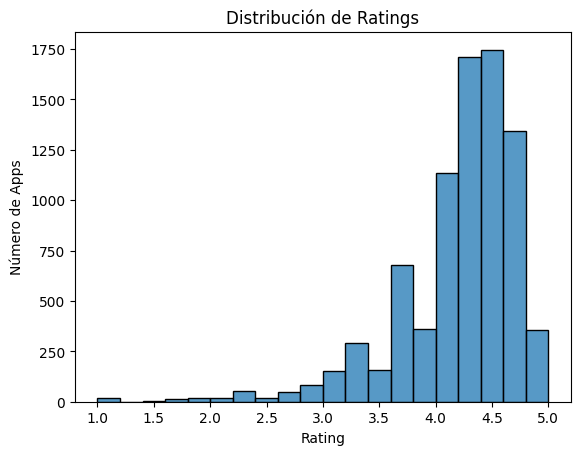

In [24]:
sns.histplot(df_apps["Rating"], bins=20)
plt.title("Distribución de Ratings")
plt.xlabel("Rating")
plt.ylabel("Número de Apps")
plt.show()

La mayoría de apps tienen valoraciones entre 4.0 y 4.5, y hay muy pocas con rating por debajo de 3.0. Podemos apreciar claramente la forma acampanada de la distribución, asentándose la mayor parte de las valoraciones entre 3.8 y 4.6 más o menos. Hay en comparación muchas más apps con un 5 que con valoración muy baja (por debajo de 2.5).

Podríamos decir que Google Play parece tener un sesgo positivo en valoraciones, y es que seguramente las apps mal valoradas acaben desapareciendo, dejándose abandonadas o incluso siendo ocultadas por la plataforma.
Es un buen primer análisis, aunque debemos compararlo con otras variables, como el número de descargas, ya que apps con valoraciones extremadamente altas y sin muchas descargas no resultarían demasiado significativas.
Es decir, el rating por sí solo no es suficiente para determinar el éxito, ya que la mayoría de aplicaciones tienen una puntuación media bastante alta.

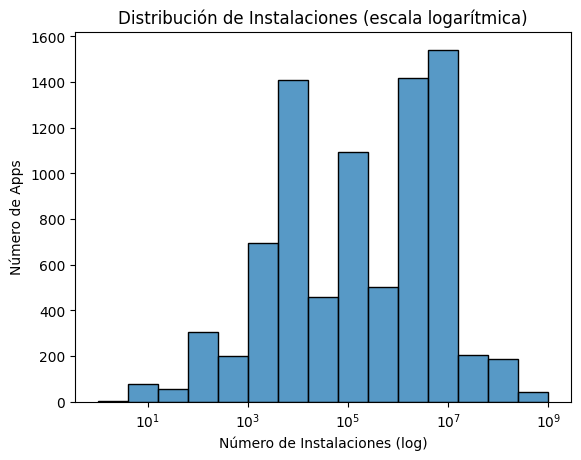

In [25]:
sns.histplot(df_apps["Installs"], bins=15, log_scale=True)
plt.title("Distribución de Instalaciones (escala logarítmica)")
plt.xlabel("Número de Instalaciones (log)")
plt.ylabel("Número de Apps")
plt.show()

Installs es la variable que mide la popularidad objetiva de una aplicación. Nos permite detectar lo difícil que puede ser viralizar una app, qué proporción del mercado dominan las apps top y si dicho éxito esta repartido o concentrado.

Es importante usar la escala logarítmica, pues así se pueden visualizar tanto los grandes gigantes, como Youtube o Instagram, pero también las pequeñas, recién salidas al mercado.

En este caso la distribución está algo más centrada (en esta escala claro). La mayoría de apps tienen entre 10.000 y 10 millones de instalaciones, habiendo muy pocas sobre todo por debajo de 1000. Del mismo modo, solo unas pocas superan los 100 millones.

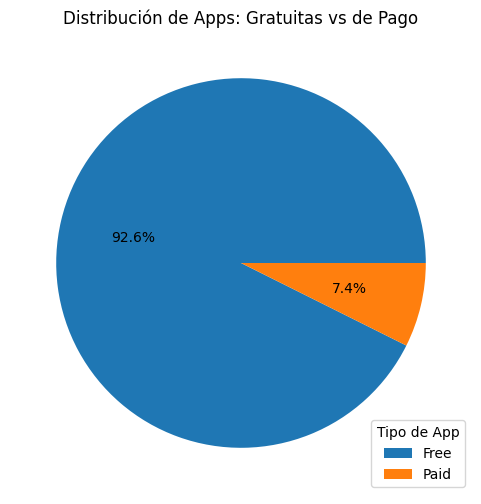

In [26]:
frec_gratuitas = df_apps["Type"].value_counts()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(
    frec_gratuitas,
    labels=None,
    autopct='%1.1f%%'
)

# Leyenda externa
plt.legend(wedges, frec_gratuitas.index, title="Tipo de App", loc="lower right")
plt.title("Distribución de Apps: Gratuitas vs de Pago")
plt.show()

Esto confirma que el ecosistema de apps en Google Play está dominado por el modelo gratuito (contando dentro obviamente las apps freemium, micropagos, anuncios implícitos, etc).

Es decir, si quieres que tu app triunfe, ha de ser gratuita preferiblemente.

Las apps de pago son una minoría, más tarde analizaremos si, siendo de pago, tienden a triunfar más, ofrecer contenido de valor...

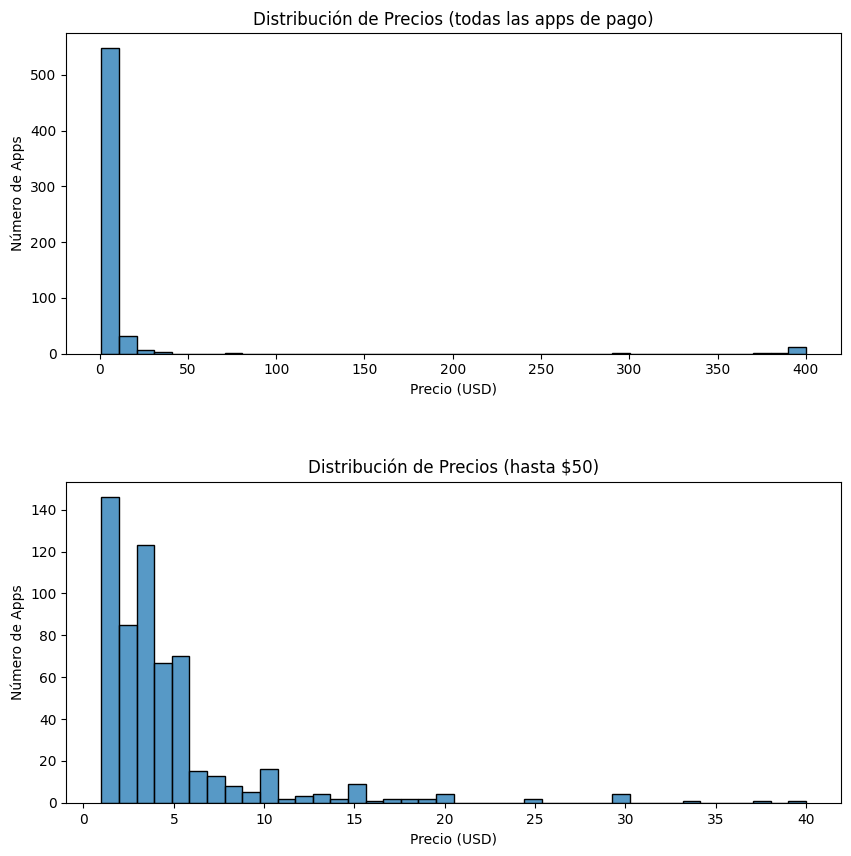

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

sns.histplot(df_apps[df_apps["Price"] > 0]["Price"], bins=40, ax=axes[0])
axes[0].set_title("Distribución de Precios (todas las apps de pago)")
axes[0].set_xlabel("Precio (USD)")
axes[0].set_ylabel("Número de Apps")

sns.histplot(df_apps[(df_apps["Price"] > 0) & (df_apps["Price"] <= 50)]["Price"], bins=40, ax=axes[1])
axes[1].set_title("Distribución de Precios (hasta $50)")
axes[1].set_xlabel("Precio (USD)")
axes[1].set_ylabel("Número de Apps")

plt.subplots_adjust(hspace=0.4)
plt.show()

Claramente se ve que casi todas las apps de pago tienen un precio bajo.
Aparecen algunos outliers extremos (hay menos de 10 aplicaciones que valgan más de 40$, en general a partir de 20 podríamos decir que son todo outliers), por eso hacemos las dos gráficas.
La distribución es, como era de esperar, decreciente: a medida que sube el precio, disminuye el número de apps.
Tiene sentido pues, si ya la mayoría de apps son gratuitas, si el usuario elige una de pago no va a estar dispuesto a gastar mucho.

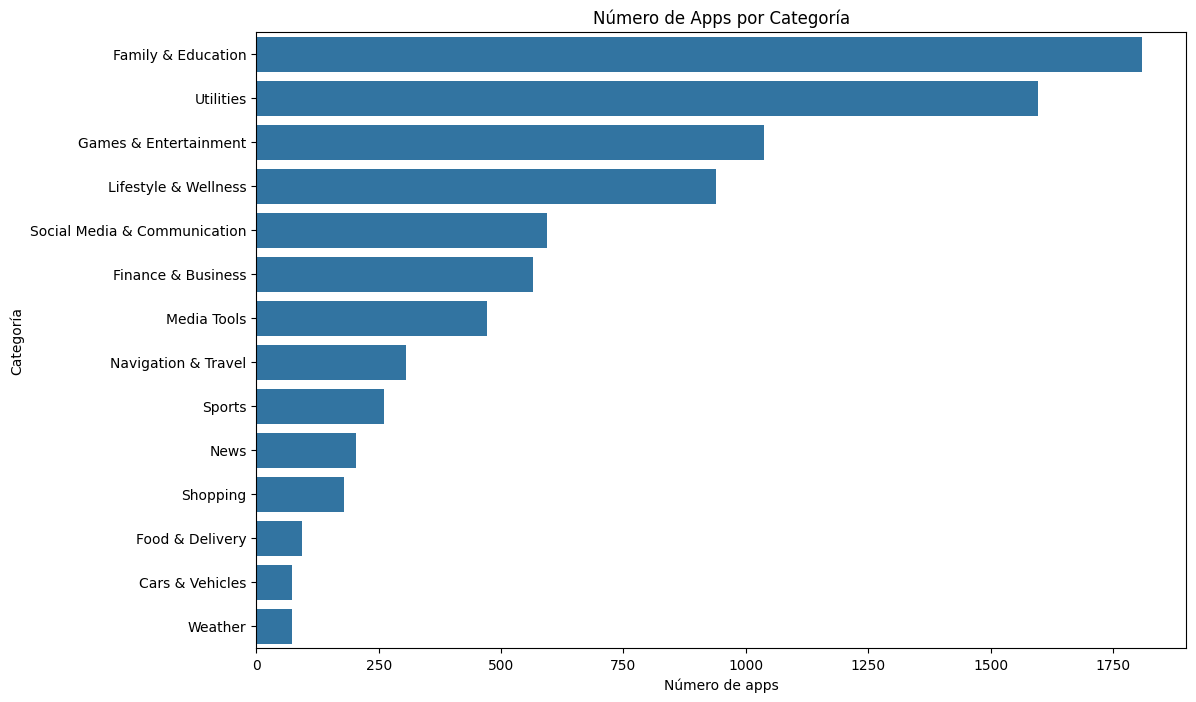

In [28]:
plt.figure(figsize=(12, 8))
orden_categorias = df_apps["Category"].value_counts().index
sns.countplot(y="Category", data=df_apps, order=orden_categorias)
plt.title("Número de Apps por Categoría")
plt.xlabel("Número de apps")
plt.ylabel("Categoría")
plt.show()

### 4. Análisis bivariante

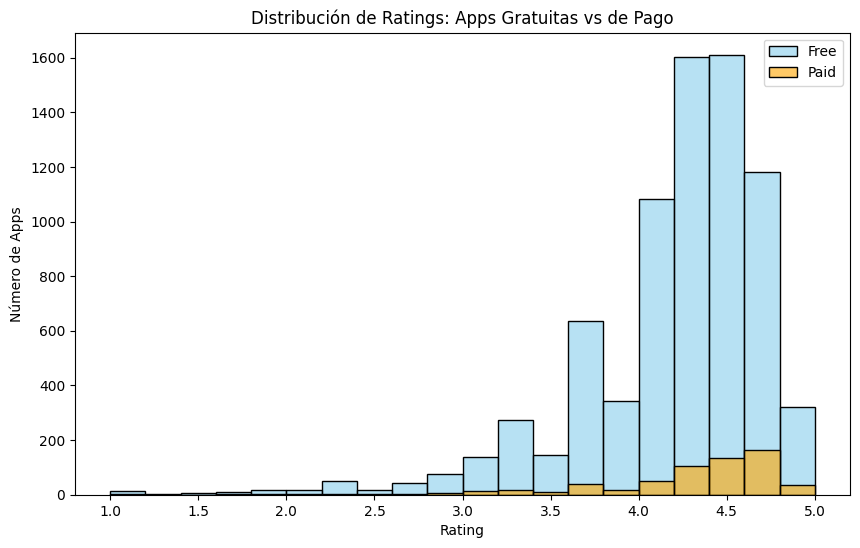

In [29]:
plt.figure(figsize=(10, 6))

sns.histplot(df_apps[df_apps["Type"] == "Free"]["Rating"], bins=20, color="skyblue", label="Free", alpha=0.6)
sns.histplot(df_apps[df_apps["Type"] == "Paid"]["Rating"], bins=20, color="orange", label="Paid", alpha=0.6)

plt.title("Distribución de Ratings: Apps Gratuitas vs de Pago")
plt.xlabel("Rating")
plt.ylabel("Número de Apps")
plt.legend()
plt.show()

In [30]:
from scipy.stats import ttest_ind

free_ratings = df_apps[df_apps["Type"] == "Free"]["Rating"]
paid_ratings = df_apps[df_apps["Type"] == "Paid"]["Rating"]

t_stat, p_valor = ttest_ind(free_ratings, paid_ratings, equal_var=False)

print(f"Media de apps gratuitas : {free_ratings.mean():.2f}")
print(f"Media de apps de pago   : {paid_ratings.mean():.2f}")
print(f"p-valor del test        : {p_valor:.6f}")

Media de apps gratuitas : 4.17
Media de apps de pago   : 4.26
p-valor del test        : 0.000083


Ambas distribuciones están centradas en valoraciones altas (entre 4 y 5), como habíamos analizado antes. Además, podemos ver que la distribución de las de pago está un poco más desplazada a la derecha (valoración media mas alta), aunque no es del todo significativo. Lo que si apreciamos es que hay muchas menos apps de pago con ratings bajos (por debajo de 3.5)

Quizás los usuarios que pagan por una app tienen más predisposición a valorarla bien, por el efecto psicológico de "justificar la compra", o quizás es que al ser de pago, están más pulidas y por eso están mejor valoradas. Sobre todo, y algo que puede ser diferencial en las valoraciones, es que las apps de pago no suelen (casi nunca), tener anuncios. De hecho, gran parte del modelo "freemium" se basa en aplicaciones gratuitas plagadas de anuncios, que te ofrecen eliminarlos pagando una cierta cantidad. Es decir, acabarían siendo una aplicación de pago, a pesar de estar categorizadas como gratuitas en Google Play.

En cuanto al test de hipótesis, el p-valor es muy bajo (0.00008 < 0.05), es decir, podríamos decir que las apps de pago presentan, en promedio, una valoración significativamente más alta que las gratuitas. Las gratuitas compiten en volumen, y aunque la valoración suele ser alta, muchas pueden ser “apps basura”.

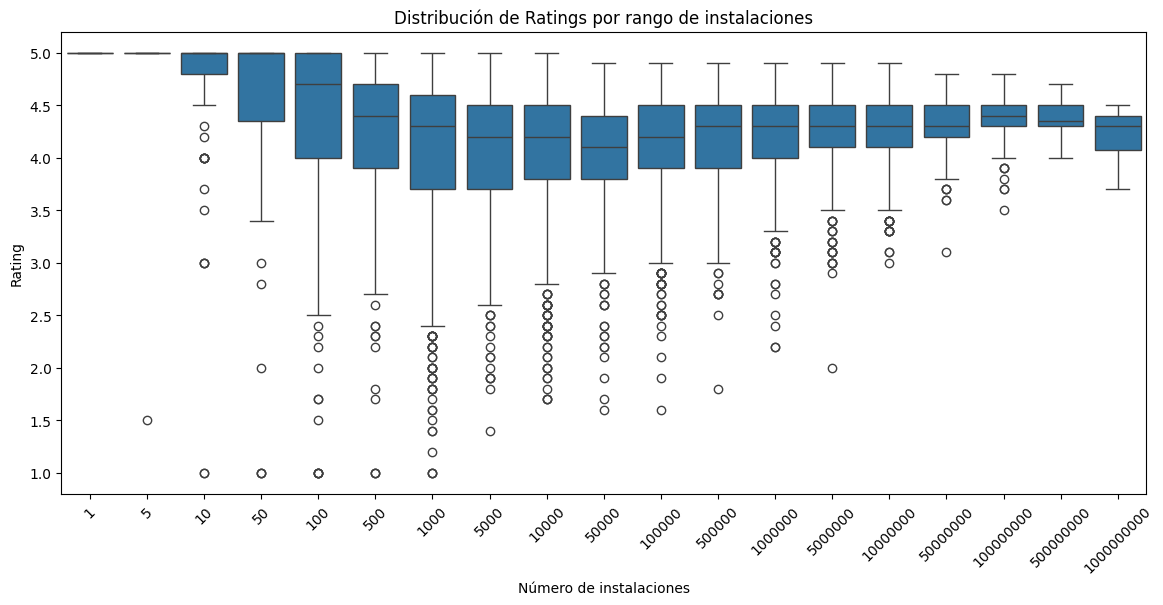

In [31]:
plt.figure(figsize=(14, 6))
sns.boxplot(x="Installs", y="Rating", data=df_apps)
plt.title("Distribución de Ratings por rango de instalaciones")
plt.xlabel("Número de instalaciones")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()

Interpretemos este boxplot por tramos, puesto que es como están categorizadas las instalaciones:

En cuanto a las apps con un número bajo de instalaciones, los ratings son sospechosamente altos, muchos clavados en 5, lo cual puede hacernos sospechar que sean autovaloraciones del desarrollador o de conocidos. La dispersión es muy pequeña, casi nula (las cajas son prácticamente una línea) y los valores están concentrados casi en 5, está muy sesgado.

En cuanto a los tramos intermedios (100 a 10.000), la mediana baja y aparece más variabilidad, hay tanto buenos como malos ratings, con algun outlier con puntuaciones muy bajas. Es decir, cuando llegamos a un número ya decente de instalaciones, es raro que la gente siga dando uso a la aplicación si no es suficientemente buena, por eso las puntuaciones tan bajas son casos extremos. En este rango, ya se empiezan a consolidar y dispersar más las valoraciones, no hay tanto sesgo.

En tramos ya altos, a partir de 100.000, la mediana se estabiliza alrededor de 4.3–4.4 y las cajas se estrechan, hay menos dispersión. Esto refleja que las apps muy descargadas y ya consolidadas seguramente sean ya conocidas, estén bien optimizadas y, por tanto, asentadas en un rating medio bastante alto.

En resumen, las apps con muy pocas instalaciones tienden a estar infladas por valoraciones extremas. A medida que una app se vuelve más popular, su rating se estabiliza y se vuelve más representativo del juicio de la comunidad. Finalmente, las apps más descargadas tienden a consolidarse en un rango de rating alto, pero no extremo (4.2–4.4).

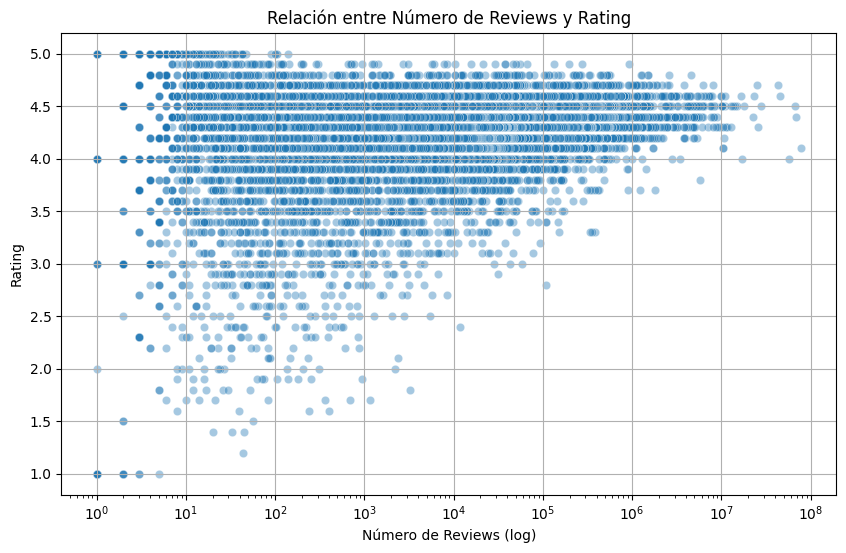

Correlación Pearson: 0.0551
p-valor: 0.0000006


In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_apps, x="Reviews", y="Rating", alpha=0.4)
plt.xscale("log")
plt.title("Relación entre Número de Reviews y Rating")
plt.xlabel("Número de Reviews (log)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

from scipy.stats import pearsonr
corr_reviews_rating, p_reviews_rating = pearsonr(df_apps["Reviews"], df_apps["Rating"])

print(f"Correlación Pearson: {corr_reviews_rating:.4f}")
print(f"p-valor: {p_reviews_rating:.7f}")

El scatter muestra una nube densa de puntos en la zona de rating 4–5 y sobre todo a partir de las 100.000 reviews (ya sabíamos que era el rango de instalaciones, y por tanto reviews y rating dónde se concentran casi todas las apps). Por debajo de 10000 hay una enorme variabilidad de rating entre ellas.

Las apps con muchas reviews suelen ser más conocidas, con más comunidad, más soporte y mejoras continuas, resolviendo los errores que pueden señalarse en estas mismas reseñas. En cambio, las apps con pocas reseñas son más volátiles (claramente el número de reseñas es proporcional al de instalaciones).

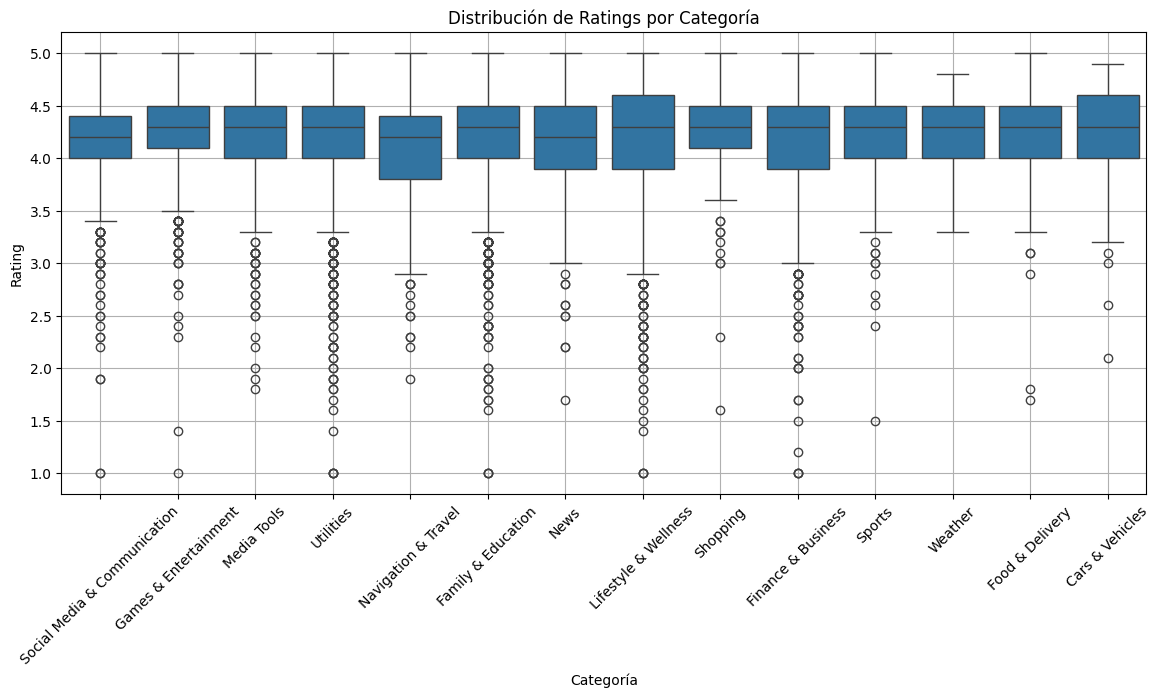

In [33]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_apps, x="Category", y="Rating")
plt.xticks(rotation=45)
plt.title("Distribución de Ratings por Categoría")
plt.xlabel("Categoría")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

Es más informativo que otra cosa, tampoco podemos llegar a ninguna conclusión abrumadora

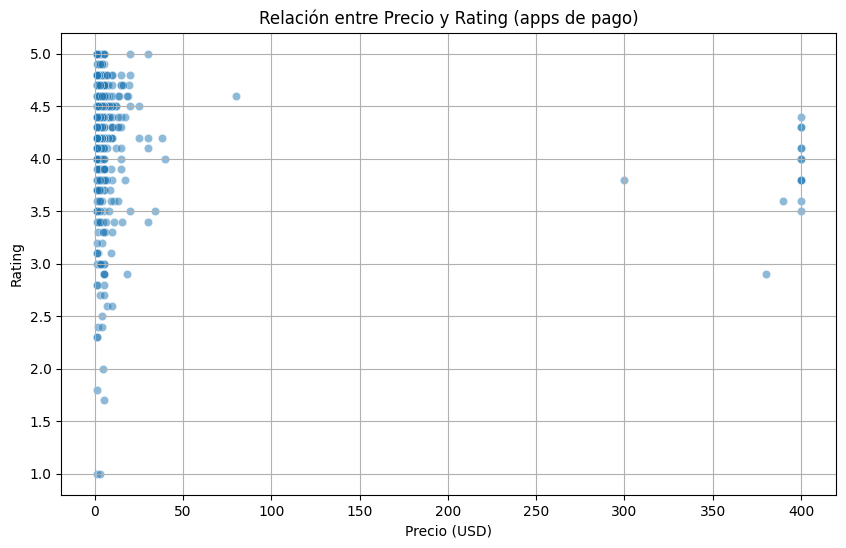

In [34]:
paid_apps = df_apps[df_apps["Type"] == "Paid"]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=paid_apps, x="Price", y="Rating", alpha=0.5)
plt.title("Relación entre Precio y Rating (apps de pago)")
plt.xlabel("Precio (USD)")
plt.ylabel("Rating")
plt.grid(True)
plt.show()

Lo más significativo es que las pocas apps de más de $100 no tienen mejores ratings, de hecho bajan un poco en general. Quizás puede ser debido a las altas expectativas: si una app es cara, el usuario espera mucho más (como podría ser lógico) y va a ser más duro en caso de que haya errores o algo no le guste. Además algunas de las apps más caras tienden a ser de nicho profesional o incluso estafas en algunos casos.

Queda claro que, en caso de descargar una app de pago, el usuario medio prefiere precios contenidos.

En conclusión, aunque la relación entre precio y valoración es débil, los datos sí que muestran una leve tendencia a que las apps más caras estén de hecho peor valoradas. Es decir, precio no garantiza calidad ni satisfacción, e incluso puede generar frustración si el producto no cumple las expectativas.

### 5. Ejemplos y extras

In [35]:
# Apps con más de 1.000.000 instalaciones y rating < 3
populares_basura = df_apps[(df_apps["Installs"] >= 1_000_000) & (df_apps["Rating"] < 3)]
populares_basura = populares_basura.sort_values(by="Installs", ascending=False)[["App", "Category", "Rating", "Installs"]]

display(populares_basura)

,App,Category,Rating,Installs
1975,3D Holograms Joke,Family & Education,2.9,5000000
1976,AppFinder by AppTap,Utilities,2.0,5000000
3386,How Old am I?,Family & Education,2.8,1000000
3387,Club Penguin Island,Family & Education,2.8,1000000
3388,AirWatch Inbox,Finance & Business,2.7,1000000
3389,BT Notifier,Utilities,2.5,1000000
3390,PS4 Second Screen,Family & Education,2.4,1000000
3391,CZ File Manager,Utilities,2.2,1000000
3392,Moto Z Market,Utilities,2.2,1000000


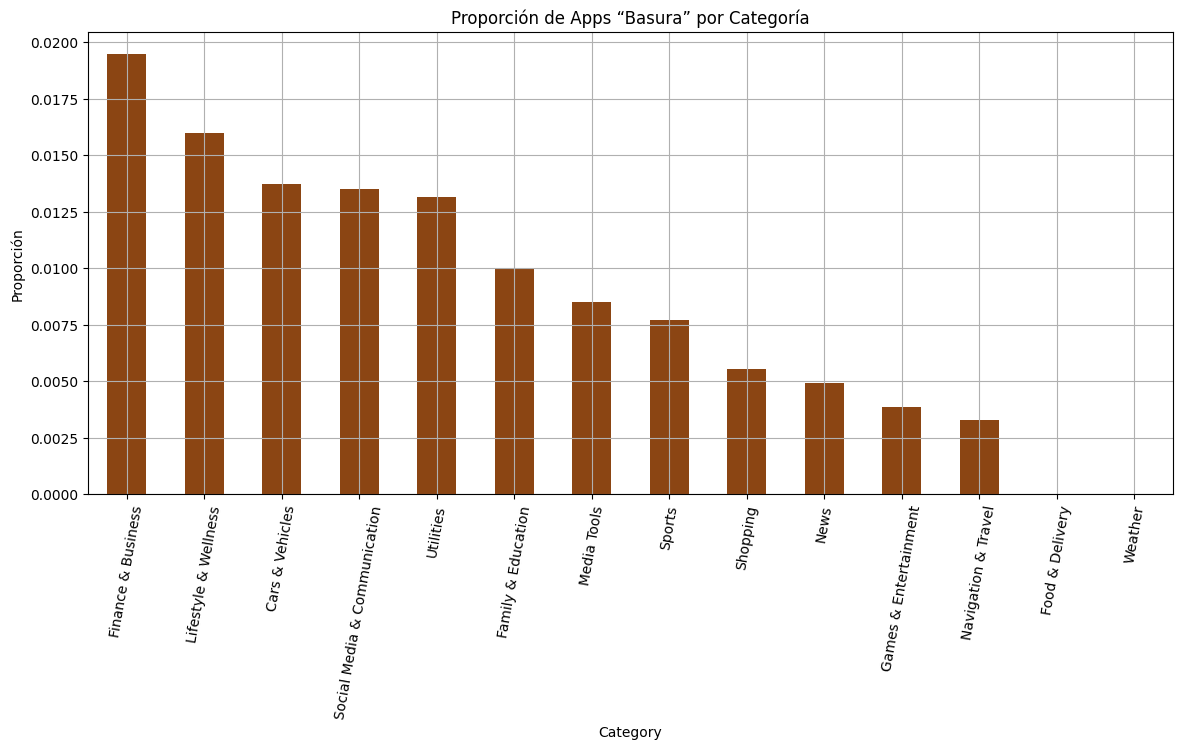

In [36]:
# Creamos una columna para categorizar las apps basura
df_apps["Is_Junk"] = ((df_apps["Rating"] < 3.5) & (df_apps["Installs"] < 1000))

# Calculamos la proporción de apps basura por categoría
proporcion_basura = df_apps.groupby("Category")["Is_Junk"].mean().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
proporcion_basura.plot(kind="bar", color="saddlebrown")
plt.title("Proporción de Apps “Basura” por Categoría")
plt.ylabel("Proporción")
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

Hemos categorizado una app como “basura” si tiene un rating < 3.5 y al menos 1000 instalaciones (para que sea representativo).

Finance & Business y Lifestyle & Wellness son las categorías con más proporción de apps basura.

En el otro extremo, Weather y Food & Delivery no tienen ningún caso de apps de mala calidad.

Curiosamente, Social Media & Communication también tiene una tasa bastante alta.

Podríamos decir que las apps funcionales y de servicios (finanzas, salud, coches) tienen mayor riesgo de frustrar al usuario.

En cambio, apps de entretenimiento, meteorología, comida o navegación, quizás por darles un uso menos intensivo, tienden a cumplir las expectativas, ser más simples de desarrollar bien o simplemente cumplir su propósito.

In [37]:
# El grupo del billón de descargas
top_downloaded = df_apps[df_apps["Installs"] == 1000000000].sort_values(by=["Rating"], ascending=False).reset_index(drop = True)
display(top_downloaded)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Is_Junk
0,Instagram,Social Media & Communication,4.5,66577446.0,Varies with device,1000000000,Free,0.0,False
1,Subway Surfers,Games & Entertainment,4.5,27725352.0,76M,1000000000,Free,0.0,False
2,Google Photos,Media Tools,4.5,10859051.0,Varies with device,1000000000,Free,0.0,False
3,Google,Utilities,4.4,8033493.0,Varies with device,1000000000,Free,0.0,False
4,WhatsApp Messenger,Social Media & Communication,4.4,69119316.0,Varies with device,1000000000,Free,0.0,False
5,Google Drive,Utilities,4.4,2731211.0,Varies with device,1000000000,Free,0.0,False
6,Google Chrome: Fast & Secure,Social Media & Communication,4.3,9643041.0,Varies with device,1000000000,Free,0.0,False
7,Maps - Navigate & Explore,Navigation & Travel,4.3,9235373.0,Varies with device,1000000000,Free,0.0,False
8,Google Play Games,Family & Education,4.3,7168735.0,Varies with device,1000000000,Free,0.0,False
9,Gmail,Social Media & Communication,4.3,4604483.0,Varies with device,1000000000,Free,0.0,False


In [38]:
# Las mejor valoradas con, al menos, un millón de descargas
top_rated = df_apps[df_apps["Reviews"] > 1000000].sort_values(by="Rating", ascending=False)[["App", "Category", "Rating", "Reviews"]].head(20)
display(top_rated)

,App,Category,Rating,Reviews
232,"DU Recorder – Screen Recorder, Video Editor, Live",Media Tools,4.8,2588730.0
453,PewDiePie's Tuber Simulator,Family & Education,4.8,1499466.0
454,Vlogger Go Viral - Tuber Game,Family & Education,4.8,1304467.0
452,Eternium,Family & Education,4.8,1506783.0
455,Amino: Communities and Chats,Social Media & Communication,4.8,1264084.0
44,Period Tracker - Period Calendar Ovulation Tra...,Lifestyle & Wellness,4.8,4559407.0
497,Domino's Pizza USA,Food & Delivery,4.7,1032935.0
46,Duolingo: Learn Languages Free,Family & Education,4.7,6297590.0
236,"Video Editor Music,Cut,No Crop",Media Tools,4.7,2163282.0
238,Bubble Witch 3 Saga,Games & Entertainment,4.7,1732263.0


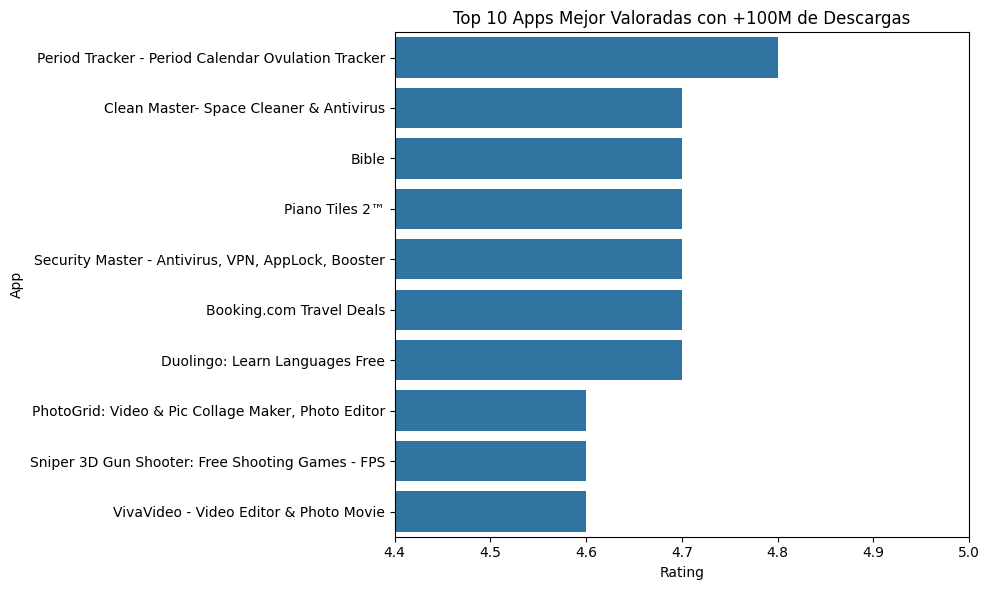

In [39]:
# Apps con al menos 100M descargas y rating >= 4.5
top_elite = df_apps[(df_apps["Installs"] >= 100_000_000) & (df_apps["Rating"] >= 4.5)]
top_elite = top_elite.sort_values(by="Rating", ascending=False)[["App", "Category", "Rating", "Installs"]].head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_elite, y="App", x="Rating")
plt.title("Top 10 Apps Mejor Valoradas con +100M de Descargas")
plt.xlabel("Rating")
plt.ylabel("App")
plt.xlim(4.4, 5)
plt.tight_layout()
plt.show()